# MDF Feature engineering

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from prepare_data import PROCESSED_BIG, PROCESSED_SUBSTANCES, PROCESSED_VOIE_ADMIN, TARGET_COLUMNS, TRAIN, TEST, SOURCE

-- get_unique_noconst --
- Number of found duplicated rows :  1389
- Remove constant columns :  (10846, 41) -> (10846, 41)
- Dropped const columns :  


In [3]:
print PROCESSED_BIG.shape, PROCESSED_BIG.columns.values
#PROCESSED_BIG.tail(5)

(10846, 40) [u'agrement col' u'date amm annee' u'date declar annee' u'etat commerc'
 u'forme pharma' u'libelle_ampoule' u'libelle_capsule' u'libelle_comprime'
 u'libelle_film' u'libelle_flacon' u'libelle_gelule' u'libelle_pilulier'
 u'libelle_plaquette' u'libelle_poche' u'libelle_sachet'
 u'libelle_seringue' u'libelle_stylo' u'libelle_tube' u'nb_ampoule'
 u'nb_capsule' u'nb_comprime' u'nb_film' u'nb_flacon' u'nb_gelule' u'nb_ml'
 u'nb_pilulier' u'nb_plaquette' u'nb_poche' u'nb_sachet' u'nb_seringue'
 u'nb_stylo' u'nb_tube' u'prix' 'source' u'statut' u'statut admin'
 u'titulaires' u'tx rembours' u'type proc' 'logprix']


In [4]:
print PROCESSED_SUBSTANCES.shape
#PROCESSED_SUBSTANCES.tail(5)

(10846, 1768)


In [6]:
PROCESSED_TRAIN = PROCESSED_BIG[PROCESSED_BIG[SOURCE] == TRAIN].drop(SOURCE, axis=1)
PROCESSED_TRAIN_SUBS = PROCESSED_SUBSTANCES[PROCESSED_SUBSTANCES[SOURCE] == TRAIN].drop(SOURCE, axis=1)
PROCESSED_TRAIN_VOIE_ADMIN = PROCESSED_VOIE_ADMIN[PROCESSED_VOIE_ADMIN[SOURCE] == TRAIN].drop(SOURCE, axis=1)

### Price histograms

In [7]:
import matplotlib.cm as cmx
import matplotlib.colors as colors

def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

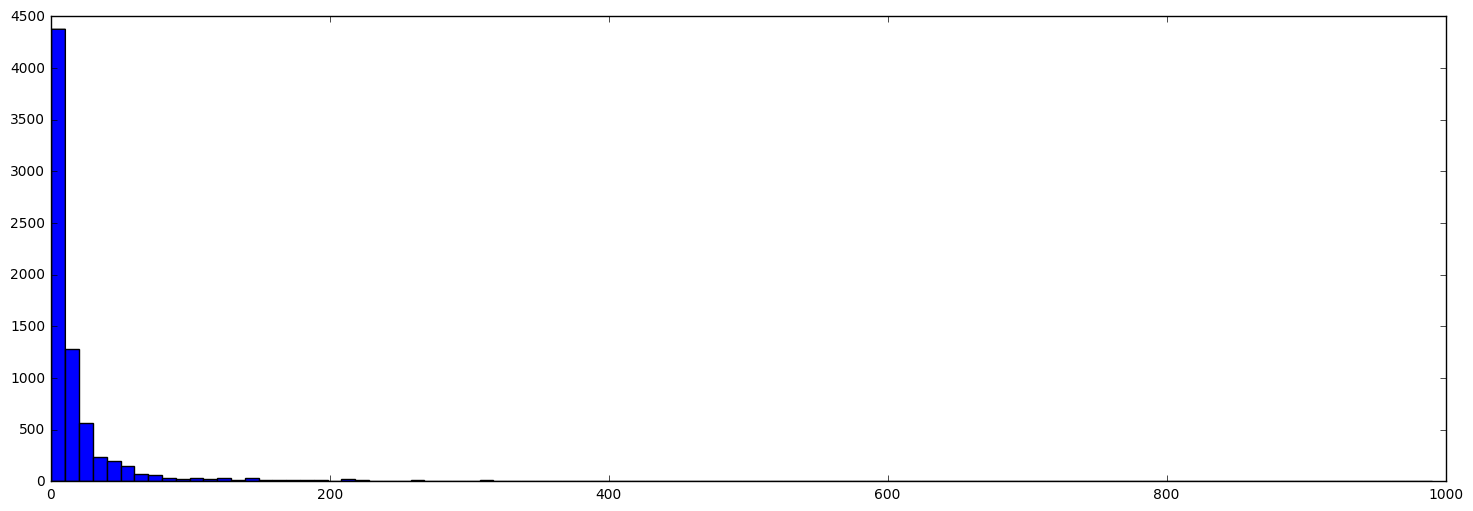

In [8]:
plt.figure(figsize=(18, 6))
out = plt.hist(PROCESSED_TRAIN['prix'], bins=100)
#sns.distplot(PROCESSED_TRAIN['prix'], color='green', kde=False) #kde = kernel denisty

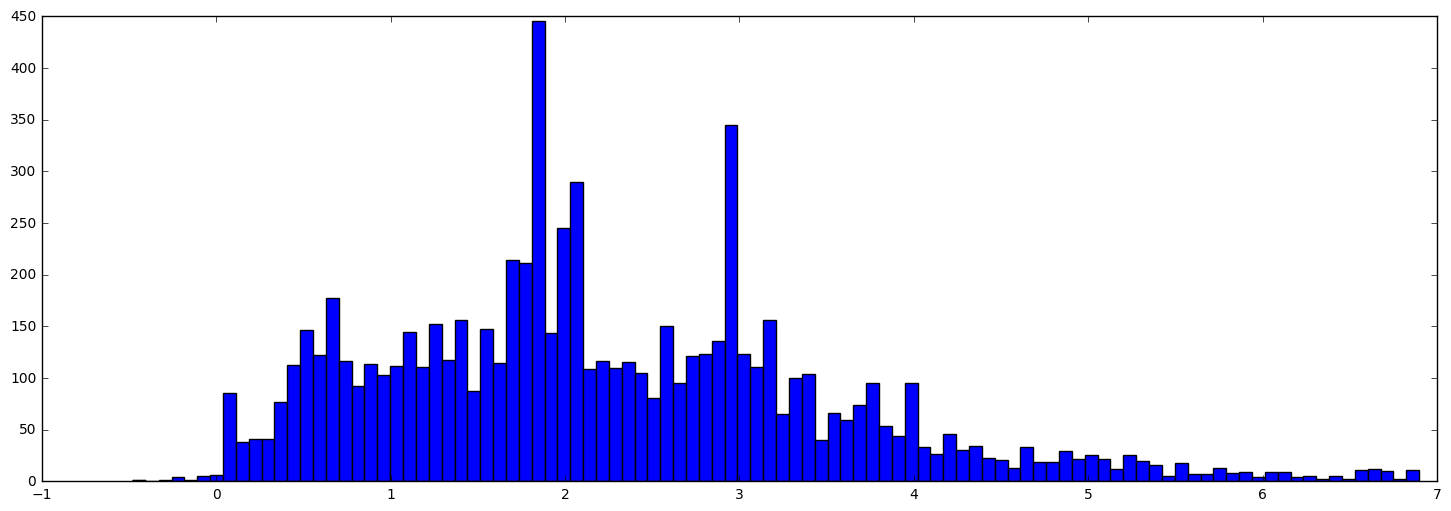

In [9]:
plt.figure(figsize=(18, 6))
PROCESSED_TRAIN['logprix'] = PROCESSED_TRAIN['prix'].apply(np.log)
out = plt.hist(PROCESSED_TRAIN['logprix'], bins=100)
#sns.distplot(PROCESSED_TRAIN['logprix'], color='green', kde=False)

### Data plots

In [21]:
maxval = np.max(PROCESSED_TRAIN_SUBS['_ENCODED_'])
minval = np.min(PROCESSED_TRAIN_SUBS['_ENCODED_'])
step = 10


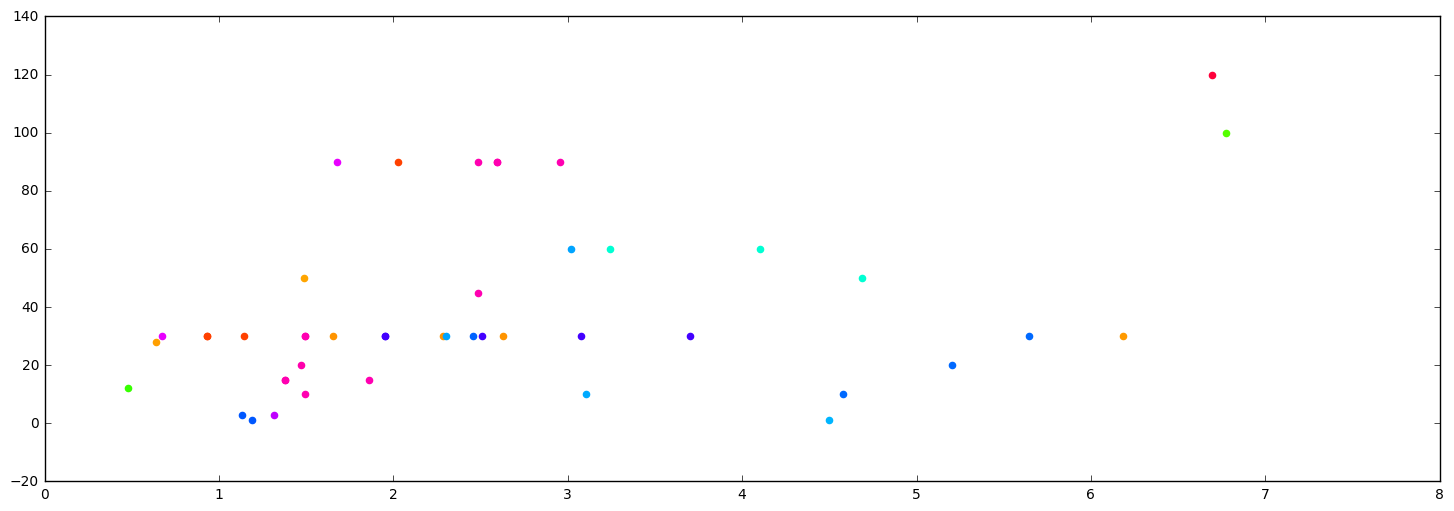

In [23]:
cmap = get_cmap(maxval - minval)    
plt.figure(figsize=(18, 6))
for i in range(minval, maxval):
    df = PROCESSED_TRAIN[((PROCESSED_TRAIN['nb_capsule'] > 0) & (PROCESSED_TRAIN_SUBS['_ENCODED_'] == i))]
    if len(df) > 0:
        XY = df[['nb_capsule', 'logprix']]                                                                                                            
        plt.scatter(XY['logprix'], XY['nb_capsule'], color=cmap(i))

In [17]:
types = [u'nb_capsule', u'nb_comprime',  u'nb_gelule', u'nb_ml']
packages = [u'nb_ampoule', u'nb_film', u'nb_flacon', u'nb_pilulier', u'nb_plaquette', u'nb_poche', u'nb_sachet', u'nb_seringue', u'nb_stylo', u'nb_tube']
types_and_packages = list(types)
types_and_packages.extend(packages)
df = PROCESSED_TRAIN
df_subs = PROCESSED_TRAIN_SUBS.drop(['_ENCODED_'], axis=1)

In [18]:
from common.preprocessing_helper import drop_const_cols

def create_df_subs_quants(df_subs, series_quants):
    cols = df_subs.columns
    df_subs_quants = pd.DataFrame(columns=cols)
    for c in cols:
        df_subs_quants[c] = df_subs[c] * series_quants
    return df_subs_quants

### Select by type : 'capsule'

In [20]:
index = 0
print "Select type only : ", types[index]
mask = df[types[index]] > 0
print "Found lines (med has the type): ", len(df[mask])
indices = range(len(types))
indices.remove(index)
for i in indices:
    mask &= df[types[i]] < 1
    
print "Found lines (med has the type only) : ", len(df[mask])
df_logprices = df[mask]['logprix']
df_subs_quants = create_df_subs_quants(df_subs[mask], df[mask][types[index]])
print df_subs_quants.shape
df_subs_quants = drop_const_cols(df_subs_quants)
print "df_subs_quants -> ", df_subs_quants.shape

Select type only :  nb_capsule
Found lines (med has the type):  46
Found lines (med has the type only) :  46
(46, 1766)
df_subs_quants ->  (46, 22)


In [24]:
df_subs_quants.head()

,ACETATEALPHA-TOCOPHEROL,ALFACALCIDOL,ALITRETINOINE,ALLOPURINOL,AMANTADINE CHLORHYDRATE,BASE FENTICONAZOLE,BASE VINORELBINE,BEXAROTENE,BROMHYDRATE DEXTROMETHORPHANE,CICLOSPORINE,DITARTRATE VINORELBINE,DUTASTERIDE,ECORCE EXTRAIT MOU PRUNIERAFRIQUE,ETOPOSIDE,EXTRAIT PRUNIERAFRIQUE,FENTICONAZOLE NITRATE,ISOTRETINOINE,MICONAZOLE NITRATE,NIFEDIPINE,PROGESTERONE,PROMESTRIENE,TIPRANAVIR
6,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0
288,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0
699,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0


### Feature importance using RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_estimators=25, random_state=0)

In [ ]:
#X = PROCESSED_TRAIN.drop(['prix', 'logprix'], axis=1)
X = PROCESSED_TRAIN_SUBS
y = PROCESSED_TRAIN['logprix']

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
# Print the feature ranking
print("Feature ranking:")
features = X.columns.values

for f in range(X.shape[1]):
    print("%d. feature %d '%s' (%f)" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()